<a href="https://colab.research.google.com/github/AndreiDragomir07/COS484_A1/blob/main/Copy_of_A1P1_Smoothing_(COS484_S2026).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook for Programming Question 1
Welcome to the programming portion of the assignment! Each assignment throughout the semester will have a theory portion and a programming portion. We will be using [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true), so if you have never used it before, take a quick look through this introduction: [Working with Google Colab](https://docs.google.com/document/d/1LlnXoOblXwW3YX-0yG_5seTXJsb3kRdMMRYqs8Qqum4/edit?usp=sharing).

We'll also be programming in Python, which we will assume a basic familiarity with. Python has fantastic community support and we'll be using numerous packages for machine learning (ML) and natural language processing (NLP) tasks.

### Learning Objectives
In this problem we will experiment with language models and implement smoothing. We will also see effects of using unigram/bigram LMs and the size of the training data.

### Data preprocessing

In this section, you should write methods to load data and clean (tokenize) it. You will need to write two functions for tokenization. One function, **basicTokenize**, should simply split the text using whitespace. The other function, **nltkTokenize**, should implement NLTK tokenization. Write another function to count the top k most frequent words in a list. You may structure this code however you like, but we suggest constructing a Tokenizer class to encompass these functions.

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[('UNK', 61019), ('the', 41029), ('of', 25132), (',', 23570), ('.', 17873), ('and', 17814), ('to', 16269), ('a', 13777), ('in', 13071), ('is', 7608)]
[('UNK', 61019), ('the', 40854), ('of', 25087), ('and', 17563), ('to', 16190), ('a', 13659), ('in', 12973), ('is', 7378), ('that', 6324), ('for', 6000)]


### Language Modeling and Smoothing
In this section, you should write methods to train and test a bigram language model. These functions will need to include computing bigram counts, estimating bigram probabilities, and calculating perplexity on the test set. You should also implement a method that can later be called to modify the probabilities with add-alpha smoothing. We suggest encompassing these functions in a LanguageModel class to make experiments easier to run.

### Instantiate an LM and calculate perplexity
Write a wrapper method to train and evaluate a language model on a given train and dev corpus.

### Load and tokenize the training and validation data using your code from the Data Processing section

You can download training and validation datasets for this problem from the links below:
*   Training data: https://princeton-nlp.github.io/cos484/assignments/a1/brown-train.txt
*   Validation data: https://princeton-nlp.github.io/cos484/assignments/a1/brown-val.txt


In [1]:
import requests

train_url = "https://princeton-nlp.github.io/cos484/assignments/a1/brown-train.txt"
train_response = requests.get(train_url)
# Check if the request was successful
if train_response.status_code == 200:
    train_text = train_response.text
else:
    print(f"Failed to retrieve file. Status code: {train_response.status_code}")

validation_url = "https://princeton-nlp.github.io/cos484/assignments/a1/brown-val.txt"
validation_response = requests.get(validation_url)

if validation_response.status_code == 200:
      validation_text = validation_response.text
else:
    print(f"Failed to retrieve file. Status code: {validation_response.status_code}")


## Experiments

#### Plot the frequency of words
Code for sub-part (a)(b)

In [2]:
from collections import Counter
from pygments import token
import nltk
nltk.download('punkt_tab')
from collections import Counter # Added for frequency counting advice

class Tokenizer:
  # Maybe some class attributes

  def __init__(self, training_text, validation_text):
      self.training_text = training_text
      self.validation_text = validation_text

  def basicTokenize (self):
      training_tokens = self.training_text.split()
      validation_tokens = self.validation_text.split()
      return training_tokens, validation_tokens


  def nltkTokenize (self):
      training_tokens = nltk.word_tokenize(self.training_text)
      validation_tokens = nltk.word_tokenize(self.validation_text)
      return training_tokens, validation_tokens

  @staticmethod
  def frequency (word_list, k):
      counter = Counter(word_list)
      most_common_k = counter.most_common(k)
      return most_common_k




tokenizer = Tokenizer(train_text, validation_text)

nltk_list = tokenizer.nltkTokenize()[0]
basic_list = tokenizer.basicTokenize()[0]
nltk_most_common = Tokenizer.frequency(nltk_list, 10)
basic_most_common = Tokenizer.frequency(basic_list, 10)
print(nltk_most_common)
print(basic_most_common)



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[('UNK', 61019), ('the', 41029), ('of', 25132), (',', 23570), ('.', 17873), ('and', 17814), ('to', 16269), ('a', 13777), ('in', 13071), ('is', 7608)]
[('UNK', 61019), ('the', 40854), ('of', 25087), ('and', 17563), ('to', 16190), ('a', 13659), ('in', 12973), ('is', 7378), ('that', 6324), ('for', 6000)]


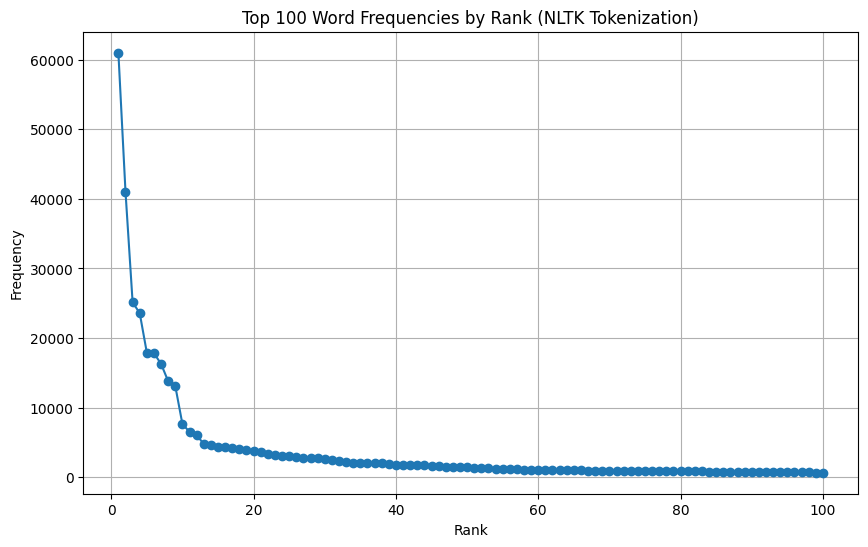

In [3]:
import matplotlib.pyplot as plt

# 1. Use the Tokenizer.frequency static method to get the top 100 most frequent words from nltk_list.
#    The nltk_list and Tokenizer class should be available from previous steps.
#    Assuming nltk_list and Tokenizer are defined in the previous cells.
top_100_words = Tokenizer.frequency(nltk_list, 100)

# 2. Extract the frequencies of these top 100 words into a list.
frequencies = [count for word, count in top_100_words]

# 3. Create a list of ranks from 1 to 100.
ranks = list(range(1, 101))

# 5. Create a line plot using the ranks on the x-axis and the frequencies on the y-axis.
plt.figure(figsize=(10, 6))
plt.plot(ranks, frequencies, marker='o', linestyle='-')

# 6. Add a title to the plot.
plt.title('Top 100 Word Frequencies by Rank (NLTK Tokenization)')

# 7. Label the x-axis as 'Rank' and the y-axis as 'Frequency'.
plt.xlabel('Rank')
plt.ylabel('Frequency')

# Optional: Add a grid for better readability
plt.grid(True)

# 8. Display the plot using plt.show().
plt.show()

**(a) **Report the top 10 words ordered by their frequency in the training corpus, both using basicTokenize and nltkTokenize. What differences do you notice between the two?**

These are the results obtained from counting the most frequent words from both tokenizer methods:

NLTK: [('UNK', 61019), ('the', 41029), ('of', 25132), (',', 23570), ('.', 17873), ('and', 17814), ('to', 16269), ('a', 13777), ('in', 13071), ('is', 7608)]

Basic: [('UNK', 61019), ('the', 40854), ('of', 25087), ('and', 17563), ('to', 16190), ('a', 13659), ('in', 12973), ('is', 7378), ('that', 6324), ('for', 6000)]

First, we can observe that NLTK tokenizer captures the frequency of commas and periods, but the basic doesn't. Second, the counts for all the words besides 'UNK' are higher in the NLTK case, because the tokenizer can separate them as indidivual words even when they're not followed immediately by a whitespace.


**(b) Using the nltkTokenize function you wrote, make a plot of the frequencies of words in the training corpus, ordered by their rank, i.e. most frequent word first, the second most word next, and so on on the x axis. Plot only the top 100 most common words to see the trend more clearly. What pattern do you observe in your plot regarding frequency and rank? Do the frequencies follow Zipf's law?**

The plot of the frequency in terms of the rank does follow an inverse relationship, confirming Zipf's law. We can also notice that there are approximately 10 words that differ significantly from the tail of words that follows.

#### Report the train and test perplexity after learning the language model
Code for sub-part (c)

In [14]:
import numpy as np
class LanguageModel:
    def __init__(self, tokenizer):
        self.training_text = tokenizer.training_text
        self.validation_text = tokenizer.validation_text

        self.vocab_word_no = {} # Initialized as instance attribute
        self.vocab_no_word = {} # Initialized as instance attribute
        self.training_tokens = tokenizer.basicTokenize()[0] # Renamed tokens_list to training_tokens
        self.validation_tokens = tokenizer.basicTokenize()[1]

        i = 0
        for word in self.training_tokens: # Use training_tokens
            if word not in self.vocab_word_no:
                self.vocab_word_no[word] = i
                self.vocab_no_word[i] = word
                i += 1 # Corrected increment operator
        # Removed the incorrect line: counts_array = self.bigram_counts

        self.counts_array = self.bigram_counts()
        self.bigram_probs = self.bigram_probabilities(self.counts_array)


    def bigram_counts(self):
        self.vocab_size = len(self.vocab_word_no)
        counts_array = np.zeros((self.vocab_size, self.vocab_size), dtype=float)

        # Iterate through the training_tokens list to form bigrams
        for i in range(len(self.training_tokens) - 1):
            word1 = self.training_tokens[i]
            word2 = self.training_tokens[i+1]

            # Get word IDs, handling unknown words by defaulting to the ID of 'UNK'
            # We assume 'UNK' exists in the training data, so it has an ID.
            # If 'UNK' were not guaranteed to be in training, we'd need a dedicated UNK ID setup.
            word1_id = self.vocab_word_no.get(word1, self.vocab_word_no.get('UNK'))
            word2_id = self.vocab_word_no.get(word2, self.vocab_word_no.get('UNK'))

            # Ensure IDs are not None before indexing, though .get() with default should prevent this
            if word1_id is not None and word2_id is not None:
                # Increment the count for the bigram
                counts_array[word1_id][word2_id] += 1
        self.counts_array = counts_array
        return counts_array

    def bigram_probabilities(self, counts_array):
        # make a vector whose values are the sum of counts on each row
        row_sums = np.sum(counts_array, axis=1)

        # Initialize probabilities array with zeros
        probabilities_array = np.zeros_like(counts_array, dtype=float)

        # Divide elements by corresponding row sums, handling division by zero
        # Only divide where row_sums is not zero
        non_zero_rows = row_sums > 0
        probabilities_array[non_zero_rows, :] = counts_array[non_zero_rows, :] / row_sums[non_zero_rows, np.newaxis]

        return probabilities_array

    def perplexity(self, tokens_list):
      log_prob_sum = 0.0 # Initialize sum of log probabilities
      num_bigrams = 0

      for i in range(len(tokens_list) - 1):
        word1 = tokens_list[i]
        word2 = tokens_list[i+1]

        # Get word IDs, handling unknown words by defaulting to the ID of 'UNK'
        word1_id = self.vocab_word_no.get(word1, self.vocab_word_no.get('UNK'))
        word2_id = self.vocab_word_no.get(word2, self.vocab_word_no.get('UNK'))

        # Ensure IDs are valid before proceeding
        if word1_id is None or word2_id is None:
            # If 'UNK' itself isn't in vocab, or some other unexpected issue, treat as infinite perplexity
            return np.inf

        prob = self.bigram_probs[word1_id][word2_id]

        if prob == 0:
            # If any probability is 0, log(0) is -infinity, making perplexity infinite
            return np.inf

        log_prob_sum += np.log2(prob) # Add log base 2 of the probability
        num_bigrams += 1

      if num_bigrams == 0:
          return np.inf # Handle case of very short token list (no bigrams)
      else:
          # Perplexity is 2 to the power of the negative average log probability
          perplexity = 2 ** (-log_prob_sum / num_bigrams)
      return perplexity


    def add_alpha (self, alpha):
      self.counts_array += alpha
      self.bigram_probs = self.bigram_probabilities(self.counts_array)


tokenizer = Tokenizer(train_text, validation_text)
lm = LanguageModel(tokenizer)
training_perplexity = lm.perplexity(lm.training_tokens)
validation_perplexity = lm.perplexity(lm.validation_tokens)
print("Training perplexity is: " + str(training_perplexity))
print("Validation perplexity is: " + str(validation_perplexity))

lm.add_alpha(0.1)
training_perplexity = lm.perplexity(lm.training_tokens)
validation_perplexity = lm.perplexity(lm.validation_tokens)
print("Training perplexity is: " + str(training_perplexity))
print("Validation perplexity is: " + str(validation_perplexity))

lm.add_alpha(-0.1)
training_perplexity = lm.perplexity(lm.training_tokens)
validation_perplexity = lm.perplexity(lm.validation_tokens)
print("Training perplexity is: " + str(training_perplexity))
print("Validation perplexity is: " + str(validation_perplexity))

Training perplexity is: 67.57755566981463
Validation perplexity is: inf
Training perplexity is: 595.9941446919605
Validation perplexity is: 1444.527143393727
Training perplexity is: 67.57755566981463
Validation perplexity is: inf


**(c) Train the model and report its perplexity on the train and validation sets. Is the train or val perplexity higher and why?**

Training perplexity is: 67.57755566981463
Validation perplexity is: inf

**(c) What do you notice about the val perplexity and why is this the case?**

The validation perplexity is infinite because probably there are bigrams in the validation set that are not in the training set, so their corresponding probability is 0.

#### Add-alpha smoothing
Code for sub-part (d)

**(d) Implement Laplace (add-$\alpha$) smoothing and retrain the model. Plot the perplexity on train and validation sets as a function of alpha (with values $10^{-5}, 10^{-4}, 10^{-3}, 10^{-2}, 10^{-1}, 1, 10$).
What happens to the validation and training perplexity as we increase alpha and why does this happen?**

TODO: ANSWER THE QUESTION HERE (DOUBLE-CLICK TO EDIT)

**(d) What seems to be a good setting for alpha? Provide brief justification.**

TODO: ANSWER THE QUESTION HERE (DOUBLE-CLICK TO EDIT)

**(e) Based on your performance in the previous experiments, propose one idea apart from Laplace smoothing to
improve the performance of your bigram language model on the validation set. Briefly describe the modification,
explain why you expect it will improve validation perplexity, and discuss any potential limitations.**

TODO: ANSWER THE QUESTION HERE (DOUBLE-CLICK TO EDIT)

# LLM Prompts

If you used an AI tool to complete any part of this assignment, please paste all prompts you used to produce your final code/responses in the box below and answer the following reflection question.

Prompts Used:
*   without code suggestions, is there a function that can count the most frequent words in a list or should I implement it myself?
*   Plot the top 100 word frequencies using nltkTokenize
*   can you implement correctly only what I wrote in the language model class



**Reflection: What parts of the AI generated output required modification or improvement? Describe the feedback you gave the tool to produce your final output or any changes you had to make on your own.**

TODO: ANSWER THE QUESTION HERE (DOUBLE-CLICK TO EDIT)